In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 

In [11]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA


In [12]:

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

In [13]:

plt.figure(2, figsize=(8, 6))
plt.clf()


<Figure size 576x432 with 0 Axes>

([], <a list of 0 Text major ticklabel objects>)

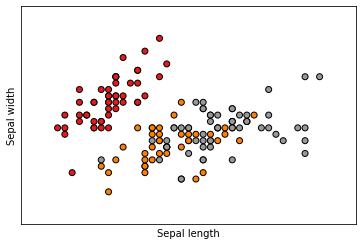

In [14]:
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())


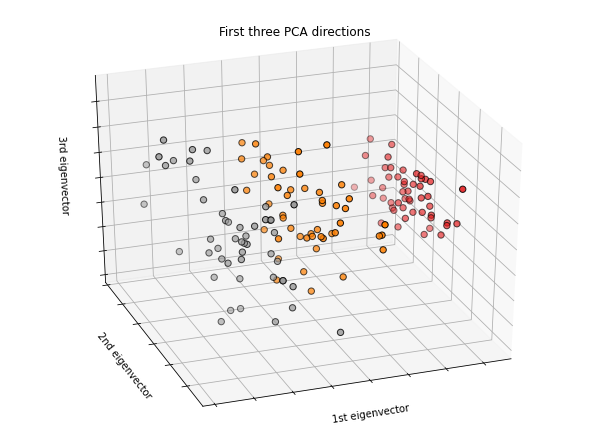

In [15]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [22]:
class_name = "class"
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df[class_name] = pd.Series(iris.target)

In [23]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
list_of_vars = [a for a in df.columns if a != class_name]
print(list_of_vars)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


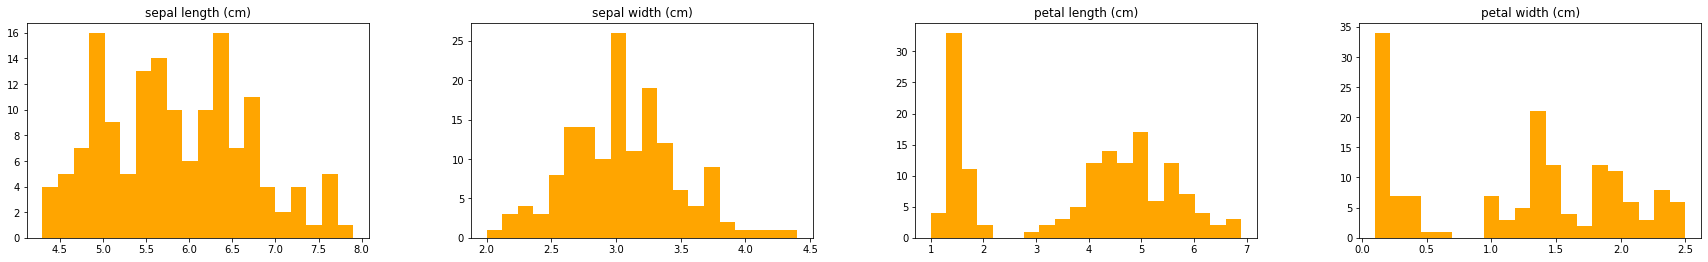

In [25]:
hist = df.hist(column= list_of_vars, bins= 20, figsize= (30, 40), layout= (8, 4), 
               xlabelsize= 10, ylabelsize= 10, grid= False, color= "orange")

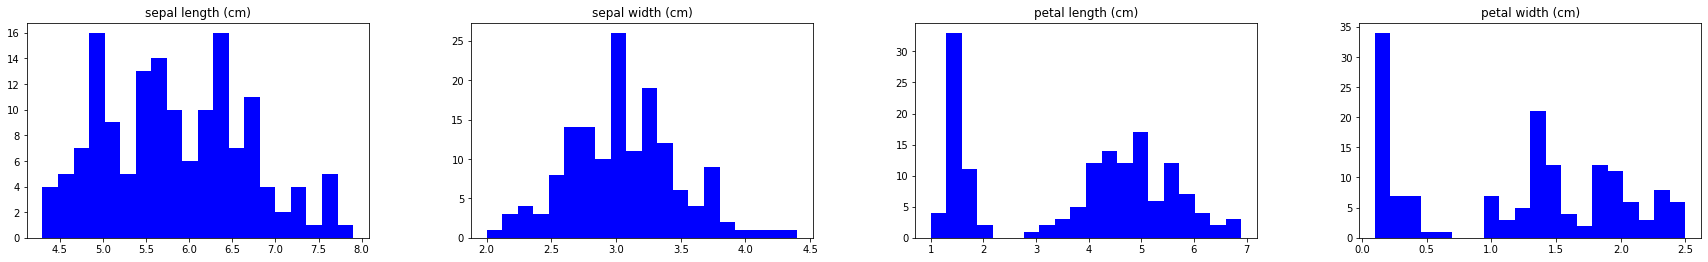

In [26]:
hist = df.hist(column= list_of_vars, bins= 20, figsize= (30, 40), layout= (8, 4), 
               xlabelsize= 10, ylabelsize= 10, grid= False, color= "blue")

In [27]:
import seaborn as sns
%matplotlib inline

In [28]:
df[class_name].unique()

array([0, 1, 2])

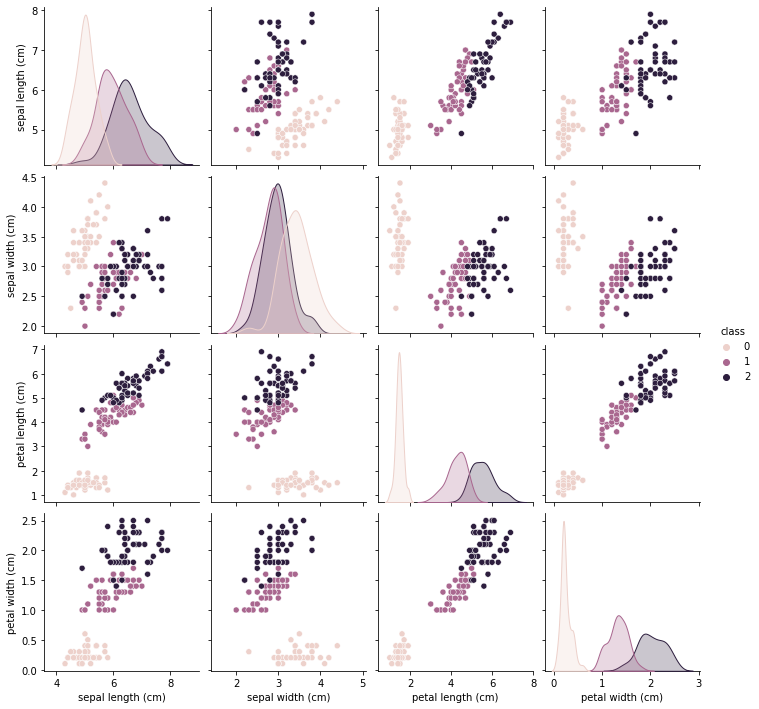

In [29]:
sns.pairplot(df, hue= class_name)


In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

In [62]:
iris_dataset = datasets.load_iris()['data']
iris_feature_names = datasets.load_iris()['feature_names']
target = datasets.load_iris()['target']
target_names = datasets.load_iris()['target_names']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset, target, test_size=0.25)
print('Nombre de donnees de train : {}'.format(len(X_train)))
print('Nombre de donnees de test : {}'.format(len(X_test)))

Nombre de donnees de train : 112
Nombre de donnees de test : 38


In [72]:
model_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 3))

param = {'kneighborsclassifier__n_neighbors': [3, 5, 7]}

grid = GridSearchCV(model_knn, param, cv=5)
print(grid)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=3, p=2,
                                                             weights='uniform'))],
                                ve

In [73]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=3, p=2,
                                                             weights='uniform'))],
                                ve

In [74]:
# best param
grid.best_params_

{'kneighborsclassifier__n_neighbors': 7}

In [76]:
# Best score
grid.best_score_

0.9470355731225297

In [77]:
# best estimator
knn_best = grid.best_estimator_

In [80]:
# Score train
knn_best.score(X_train, y_train)

0.9464285714285714

In [78]:
# Score test
knn_best.score(X_test, y_test)

1.0

In [82]:
# Confusion matrix
confusion = confusion_matrix(y_test, knn_best.predict(X_test))
confusion

array([[16,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

Prediction

In [96]:
def prediction(x, model, target_names):
  pred = model.predict(x)
  return target_names[pred]

call the predict methode

In [98]:
x_new = np.array([[4, 0.8, 2, 0.6]])
pred = prediction(x_new, knn_best, target_names)
print('La classe prsedite est : {}'.format(pred))

La classe prsedite est : ['versicolor']
